**Basic Library's**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
matches=pd.read_csv("/content/drive/MyDrive/Ipl dataset/IPL Matches 2008-2020.csv")

**EDA – Exploratory Data Analysis for IPL winner Predictor**

In [4]:
matches.shape

(816, 17)

In [48]:
Team_Name=['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
    'Rising Pune Supergiant', 'Royal Challengers Bangalore',
    'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
    'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
    'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants', 'Delhi Capitals']

team_shrt= ['SRH','MI','GL','RPS','RCB','KKR','DC','KXIP','CSK','RR','SRH','KTK','PW','RPS','DC']

In [49]:
matches.replace(Team_Name,team_shrt,inplace = True)

In [19]:
matches.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba


In [50]:
matches['season'] = matches['date'].str[:4].astype(int)

In [51]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
 17  season          

In [52]:
matches.describe(include=['int64','float64'])

,id,neutral_venue,result_margin,season
count,8.160000e+02,816.000000,799.000000,816.000000
mean,7.563496e+05,0.094363,17.321652,2013.926471
std,3.058943e+05,0.292512,22.068427,3.665054
min,3.359820e+05,0.000000,1.000000,2008.000000
25%,5.012278e+05,0.000000,6.000000,2011.000000
50%,7.292980e+05,0.000000,8.000000,2014.000000
75%,1.082626e+06,0.000000,19.500000,2017.000000
max,1.237181e+06,1.000000,146.000000,2020.000000


In [53]:
cols_to_remove = ['eliminator' , 'method' , 'venue', 'id','date']
matches.drop(labels=cols_to_remove , axis=1 , inplace = True)

In [54]:
matches.isnull().sum()

city               13
player_of_match     4
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin      17
umpire1             0
umpire2             0
season              0
dtype: int64

In [55]:
matches.dropna(inplace=True,axis=0)

In [56]:
splt_col=matches.select_dtypes(include='object')
no_col=matches.select_dtypes(include=np.number)
print('categorical_Variables are: ',splt_col.columns)

categorical_Variables are:  Index(['city', 'player_of_match', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'winner', 'result', 'umpire1', 'umpire2'],
      dtype='object')


**Label Encoding**

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in splt_col:
    matches[feat] = le.fit_transform(matches[feat].astype(str))

print (matches.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 815
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             786 non-null    int64  
 1   player_of_match  786 non-null    int64  
 2   neutral_venue    786 non-null    int64  
 3   team1            786 non-null    int64  
 4   team2            786 non-null    int64  
 5   toss_winner      786 non-null    int64  
 6   toss_decision    786 non-null    int64  
 7   winner           786 non-null    int64  
 8   result           786 non-null    int64  
 9   result_margin    786 non-null    float64
 10  umpire1          786 non-null    int64  
 11  umpire2          786 non-null    int64  
 12  season           786 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 86.0 KB
None


In [58]:
corr = matches.corr()
corr

,city,player_of_match,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,umpire1,umpire2,season
city,1.000000,0.033356,-0.095998,0.001869,0.010470,0.049168,-0.023122,-0.001974,0.029243,-0.042373,-0.080782,-0.045449,0.025197
player_of_match,0.033356,1.000000,-0.009224,-0.040538,-0.063783,-0.033345,-0.028184,-0.100092,0.021825,-0.037058,0.006509,-0.039831,-0.018511
neutral_venue,-0.095998,-0.009224,1.000000,-0.017189,0.019807,-0.002031,-0.131670,0.002717,-0.015937,0.007910,0.060012,0.061598,-0.349686
team1,0.001869,-0.040538,-0.017189,1.000000,-0.144923,0.396098,0.069795,0.514911,0.030594,0.001708,-0.026827,0.018335,0.004158
team2,0.010470,-0.063783,0.019807,-0.144923,1.000000,0.481532,-0.053663,0.347362,-0.033557,-0.008525,0.007968,-0.061240,-0.011861
toss_winner,0.049168,-0.033345,-0.002031,0.396098,0.481532,1.000000,-0.000935,0.483943,0.020134,-0.032517,0.011378,-0.045594,-0.050114
toss_decision,-0.023122,-0.028184,-0.131670,0.069795,-0.053663,-0.000935,1.000000,0.033085,0.020218,0.028201,0.043105,-0.057294,0.228629
winner,-0.001974,-0.100092,0.002717,0.514911,0.347362,0.483943,0.033085,1.000000,-0.017406,-0.007479,0.011789,0.034134,0.016169
result,0.029243,0.021825,-0.015937,0.030594,-0.033557,0.020134,0.020218,-0.017406,1.000000,-0.549009,0.001196,-0.084878,0.020417
result_margin,-0.042373,-0.037058,0.007910,0.001708,-0.008525,-0.032517,0.028201,-0.007479,-0.549009,1.000000,-0.028243,0.051096,-0.002046


**Data Visualization**

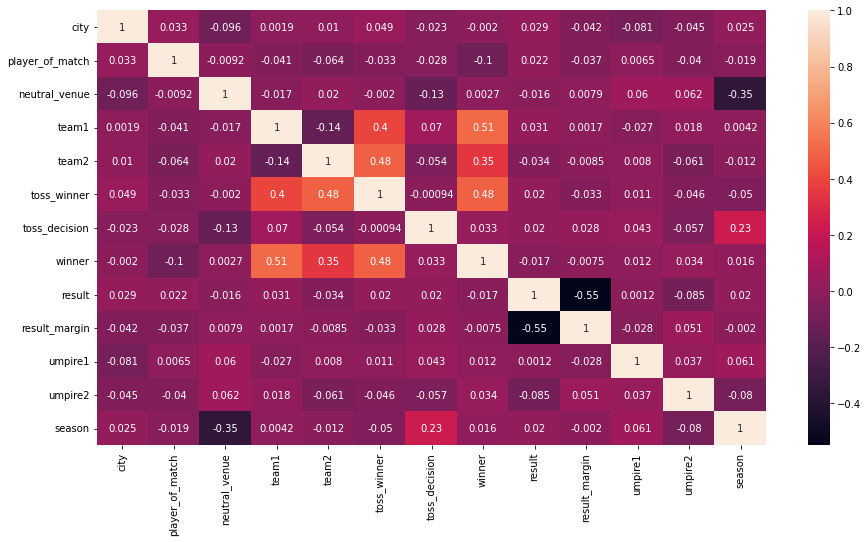

In [82]:
plt.figure(figsize=(15,8)) 
sns.heatmap(corr, annot=True);

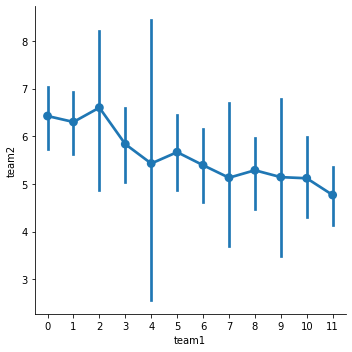

In [81]:
sns.catplot(x="team1", y="team2", kind="point", data=matches); 

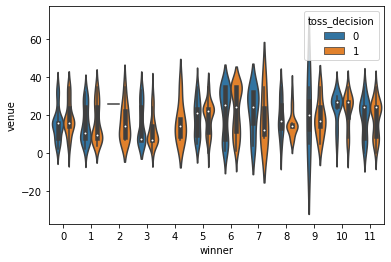

In [ ]:
sns.violinplot(x='winner',y='venue',hue="toss_decision",data=matches);

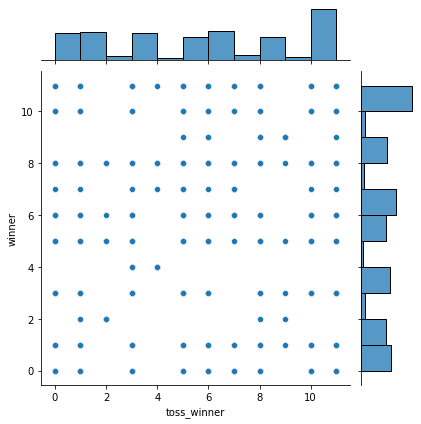

In [ ]:
sns.jointplot(x="toss_winner",y='winner',data=matches);

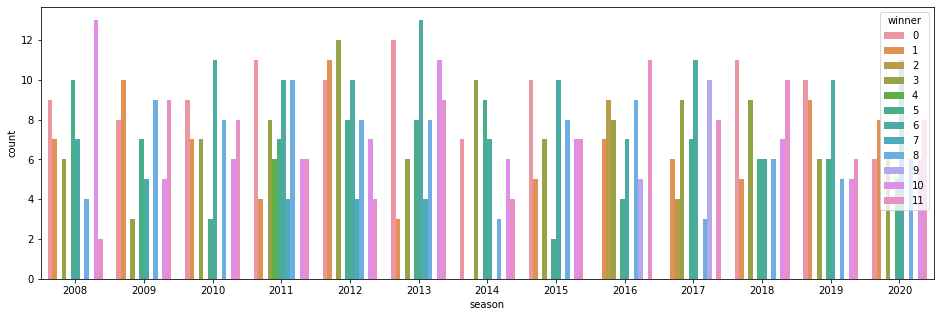

In [86]:
plt.figure(figsize=(16,5)) 
sns.countplot(x="season", hue="winner", data=matches); 
plt.show() 

**Outlier Detection**

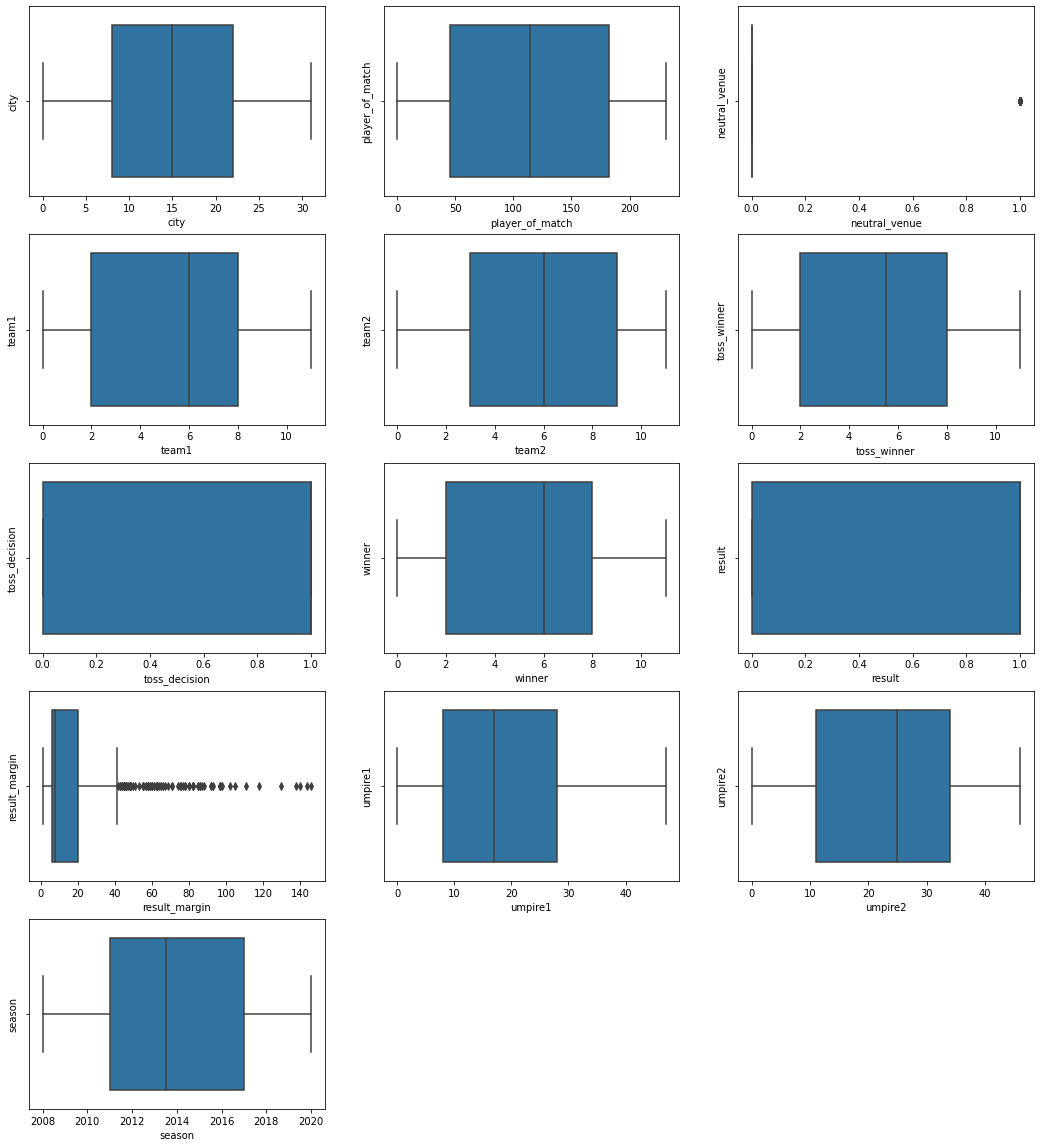

In [59]:
plt.figure(figsize=(18,100))
for i, col in enumerate(matches.columns,1):
    plt.subplot(24,3,i)
    sns.boxplot(matches[col])
    plt.ylabel(col)
plt.show()

**Spliting the variables**

In [60]:
# define x_indipendent variables and y_dependent variables:
y_dep = matches.winner
x_ind = matches.drop("winner",axis=1)

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x_ind, y_dep, test_size = 0.2, random_state = 4)

**Feature Selection**

In [62]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel 

model_rf=SelectFromModel(RandomForestClassifier(random_state=4))

In [63]:
model_rf.fit(x_train,y_train) 
SelectFromModel(estimator=RandomForestClassifier(random_state=4)) 

SelectFromModel(estimator=RandomForestClassifier(random_state=4))

In [64]:
model_rf.get_support() 

array([ True,  True, False,  True,  True,  True, False, False,  True,
        True, False, False])

In [66]:
selected_features=x_train.columns[(model_rf.get_support())] 
len(selected_features)

7

In [67]:
print(selected_features) 

Index(['city', 'player_of_match', 'team1', 'team2', 'toss_winner',
       'result_margin', 'umpire1'],
      dtype='object')


In [68]:
x_train.drop([ 'city', 'player_of_match', 'team1', 'team2', 'toss_winner',
       'result_margin', 'umpire1'], axis=1, inplace=True)
x_train 

,neutral_venue,toss_decision,result,umpire2,season
568,0,1,1,7,2016
273,0,1,1,30,2012
674,0,1,0,45,2018
667,0,1,0,11,2018
745,0,1,0,25,2019
...,...,...,...,...,...
365,0,0,0,44,2013
733,0,1,1,25,2019
458,0,1,1,9,2015
176,0,1,1,39,2011


In [69]:
x_test.drop(['city', 'player_of_match', 'team1', 'team2', 'toss_winner',
       'result_margin', 'umpire1'], axis=1, inplace=True) 
x_test 

,neutral_venue,toss_decision,result,umpire2,season
803,0,1,0,31,2020
500,0,0,1,14,2015
463,0,1,1,10,2015
732,0,1,1,9,2019
451,0,1,1,7,2014
...,...,...,...,...,...
196,0,1,0,27,2011
604,0,1,0,34,2017
31,0,1,0,6,2008
624,0,1,0,34,2017


In [72]:
matches['team1'].unique()

array([ 8,  5,  1,  6,  3, 10, 11,  0,  4,  7,  2,  9])

**Model Selection & Training:**

In [73]:
from sklearn.linear_model import LinearRegression
model_lr= LinearRegression()

In [74]:
model_lr.fit(x_train , y_train)

LinearRegression()

**Model Prediction**

In [75]:
# getting predictions
prediction = model_lr.predict(x_test)

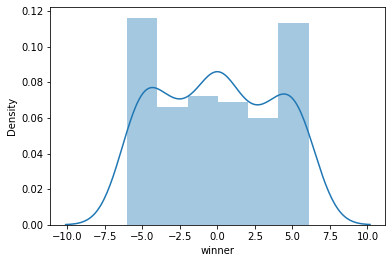

In [76]:
# plotting our fit
sns.distplot(y_test-prediction)

In [77]:
# checking for scores
from sklearn import metrics

# Mean Absolute Error

print('MAE: ', metrics.mean_absolute_error(y_test , prediction))

# Mean Squared Error

print('MSE: ', metrics.mean_squared_error(y_test, prediction))

# Root Mean Squared Error

print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE:  3.1849376147749116
MSE:  13.961558454348877
RMSE:  3.736516888005309


**CONCLUTION**

* In this notebook, we built a Linear Regression models that could approximately predict a  Indian Premier League Prediction given some information about the population. 
* Looking the above models that could give us Some metric errors are,

* MAE: 3.18
* MSE: 13.96
* RMSE:  3.736516888005309
